In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch
from sklearn.preprocessing import maxabs_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


c:\Users\yuwan\workspace\map_builder\mapbuilder\tools.py:67: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_inv_proj_error(dx, dy):
c:\Users\yuwan\workspace\map_builder\mapbuilder\tools.py:141: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_pixel_priority(img, i, j, window_width, window_height, label):


In [2]:
X, y = make_blobs(n_samples=800, centers=4, n_features=10, random_state=42)
X = maxabs_scale(X)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = np.array(X)
# y = np.array(y)
# X = X.astype('float32') / 255.
# y = y.astype('int')
# X, _, y, _ = train_test_split(X, y, train_size=3000, test_size=2000, random_state=420)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

device:  cpu
Epoch 1/150, Loss: 0.49928148
Epoch 2/150, Loss: 0.28458501
Epoch 3/150, Loss: 0.27996101
Epoch 4/150, Loss: 0.27860943
Epoch 5/150, Loss: 0.27791308
Epoch 6/150, Loss: 0.27254104
Epoch 7/150, Loss: 0.26241740
Epoch 8/150, Loss: 0.26126256
Epoch 9/150, Loss: 0.26134570
Epoch 10/150, Loss: 0.26140674
Epoch 11/150, Loss: 0.26127996
Epoch 12/150, Loss: 0.25277877
Epoch 13/150, Loss: 0.23798938
Epoch 14/150, Loss: 0.23696722
Epoch 15/150, Loss: 0.23566903
Epoch 16/150, Loss: 0.23505147
Epoch 17/150, Loss: 0.23475388
Epoch 18/150, Loss: 0.23444861
Epoch 19/150, Loss: 0.23438103
Epoch 20/150, Loss: 0.23434710
Epoch 21/150, Loss: 0.23429681
Epoch 22/150, Loss: 0.23424564
Epoch 23/150, Loss: 0.23405655
Epoch 24/150, Loss: 0.23366355
Epoch 25/150, Loss: 0.23328345
Epoch 26/150, Loss: 0.22261528
Epoch 27/150, Loss: 0.20593266
Epoch 28/150, Loss: 0.19176729
Epoch 29/150, Loss: 0.18928523
Epoch 30/150, Loss: 0.18766273
Epoch 31/150, Loss: 0.18667844
Epoch 32/150, Loss: 0.18654037
Epoc

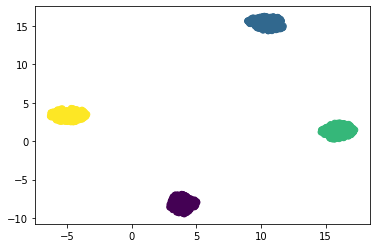

In [3]:
P = UMAP(n_components=2)

# X2D = TSNE(n_components=2).fit_transform(X)
X2D = P.fit_transform(X)
plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# Pinv = NNinv_torch()
# Pinv = RBFinv()
# Pinv = Pinv_ilamp()
Pinv.fit(X2D, X)



In [4]:
builder = MapBuilder(Pinv, None, X2d=X2D, X=X, y=y, scaling=0.9, P=P)

n_classes: 4
150


Loss: 0.8138: 100%|██████████| 150/150 [00:02<00:00, 62.42it/s]


relace the label with the gradient
relace the label with the dist_map


c:\Users\yuwan\workspace\map_builder\mapbuilder\deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


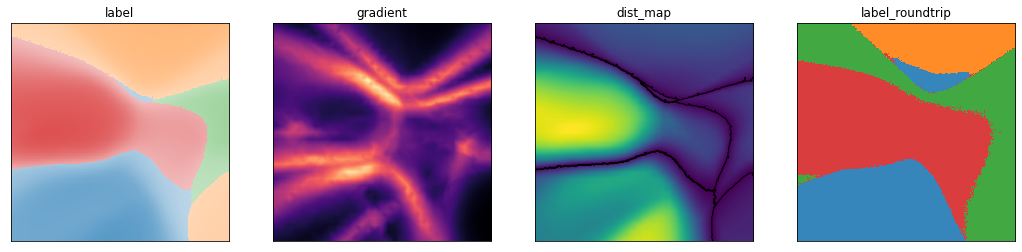

In [11]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=300)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

fig.savefig('figures/dummy.png', dpi=300)

relace the label with the gradient
relace the label with the dist_map


c:\Users\yuwan\workspace\map_builder\mapbuilder\deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


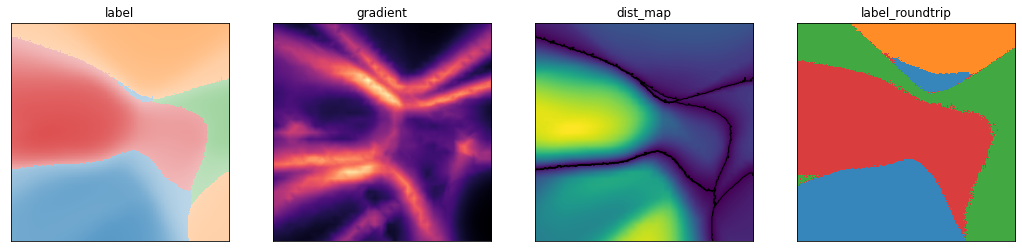

In [12]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=300)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

fig.savefig('figures/fast.png', dpi=300)

relace the label with the gradient


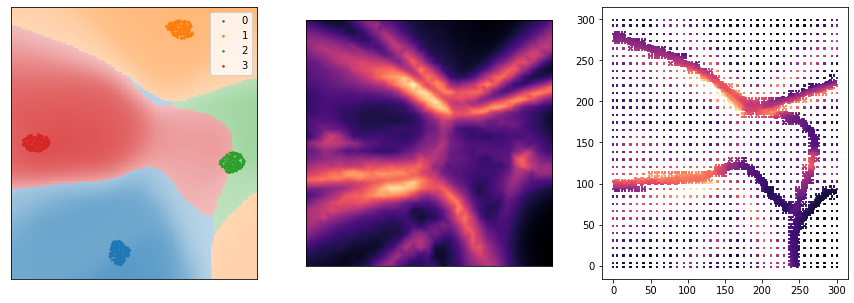

In [9]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=300)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

fig.savefig('figures/spares.png', dpi=300)
